In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import json
from datetime import datetime
import numpy as np
from fbprophet import Prophet
import pickle
import math

# Read Bitstamp Data

First, let's read in the data from Kaggle.

In [3]:
df = pd.read_csv('bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')

In [4]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3778812,1552434960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778813,1552435020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778814,1552435080,3860.09,3861.05,3860.09,3861.05,0.378637,1461.770077,3860.606378
3778815,1552435140,3860.18,3860.18,3859.74,3859.74,1.056403,4077.863045,3860.139080
3778816,1552435200,3861.37,3862.01,3861.37,3861.95,0.198124,765.149137,3861.967464


In [5]:
df['ds'] = df['Timestamp'].apply(lambda x: datetime.fromtimestamp(x))
df = df.set_index(df['ds'])

# Train Model Using Prophet

Next, let's take the log of weighted price and train our model using that feature.

In [6]:
df['y'] = np.log(df['Weighted_Price'])

In [7]:
df_subset = df[df['ds'] >= pd.Timestamp('2016-01-01')]

In [8]:
m = Prophet()

In [10]:
%time m.fit(df_subset[['ds','y']]);

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


CPU times: user 1h 23min 40s, sys: 4min 24s, total: 1h 28min 5s
Wall time: 1h 47min 25s


Only run the below if you want to save a **NEW** model

In [ ]:
with open('btc_model.pickle', 'wb') as pickle_file:
    pickle.dump(m, pickle_file)
    pickle_file.close()

Use this if you've already trained the model

In [9]:
with open('btc_model.pickle', 'rb') as pickle_file:
    m = pickle.Unpickler(pickle_file)
    m = m.load()

# Generate Prediction

Now, let's predict out prices using the model we just trained.

In [10]:
future = m.make_future_dataframe(periods=150000, freq='1min', include_history=False)
future.tail()

,ds
149995,2019-06-25 12:56:00
149996,2019-06-25 12:57:00
149997,2019-06-25 12:58:00
149998,2019-06-25 12:59:00
149999,2019-06-25 13:00:00


In [11]:
%time fcst = m.predict(future)

/usr/local/lib/python3.7/site-packages/fbprophet/forecaster.py:1008: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/usr/local/lib/python3.7/site-packages/fbprophet/forecaster.py:1132: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


CPU times: user 6min 33s, sys: 1min 10s, total: 7min 44s
Wall time: 5min 26s


In [12]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2019-03-13 09:01:00,8.212589,8.159810,8.341331,8.212589,8.212589,0.000226,0.000226,0.000226,0.040386,...,0.040386,0.040386,0.040386,0.000630,0.000630,0.000630,0.039531,0.039531,0.039531,8.252975
1,2019-03-13 09:02:00,8.212587,8.166101,8.347004,8.212587,8.212587,0.000228,0.000228,0.000228,0.040386,...,0.040386,0.040386,0.040386,0.000629,0.000629,0.000629,0.039529,0.039529,0.039529,8.252973
2,2019-03-13 09:03:00,8.212585,8.162337,8.345328,8.212585,8.212585,0.000230,0.000230,0.000230,0.040385,...,0.040385,0.040385,0.040385,0.000629,0.000629,0.000629,0.039527,0.039527,0.039527,8.252970
3,2019-03-13 09:04:00,8.212583,8.154644,8.344030,8.212583,8.212583,0.000231,0.000231,0.000231,0.040384,...,0.040384,0.040384,0.040384,0.000628,0.000628,0.000628,0.039525,0.039525,0.039525,8.252967
4,2019-03-13 09:05:00,8.212580,8.160768,8.345953,8.212580,8.212580,0.000233,0.000233,0.000233,0.040384,...,0.040384,0.040384,0.040384,0.000628,0.000628,0.000628,0.039523,0.039523,0.039523,8.252964
5,2019-03-13 09:06:00,8.212578,8.154380,8.349346,8.212578,8.212578,0.000235,0.000235,0.000235,0.040383,...,0.040383,0.040383,0.040383,0.000627,0.000627,0.000627,0.039521,0.039521,0.039521,8.252961
6,2019-03-13 09:07:00,8.212576,8.168295,8.346335,8.212576,8.212576,0.000236,0.000236,0.000236,0.040382,...,0.040382,0.040382,0.040382,0.000627,0.000627,0.000627,0.039519,0.039519,0.039519,8.252958
7,2019-03-13 09:08:00,8.212574,8.165486,8.347647,8.212574,8.212574,0.000238,0.000238,0.000238,0.040381,...,0.040381,0.040381,0.040381,0.000627,0.000627,0.000627,0.039517,0.039517,0.039517,8.252955
8,2019-03-13 09:09:00,8.212572,8.155626,8.342498,8.212572,8.212572,0.000239,0.000239,0.000239,0.040380,...,0.040380,0.040380,0.040380,0.000626,0.000626,0.000626,0.039515,0.039515,0.039515,8.252952
9,2019-03-13 09:10:00,8.212569,8.162580,8.342649,8.212569,8.212569,0.000240,0.000240,0.000240,0.040380,...,0.040380,0.040380,0.040380,0.000626,0.000626,0.000626,0.039513,0.039513,0.039513,8.252949


We can use our forecast (`fcst`) to plot the prediction we just made:

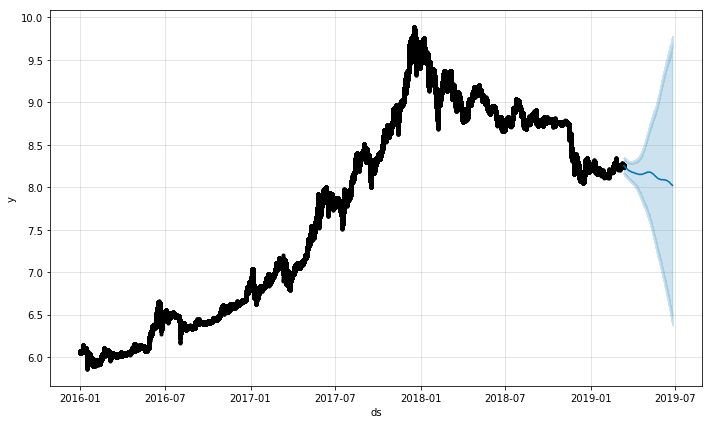

In [13]:
m.plot(fcst);

Now let's convert our `log(price)` back to price and calculate whether the minute is a buy or sell minute

In [14]:
fcst['yhat_exp'] = fcst['yhat'].apply(lambda x: math.exp(x))

In [15]:
output = fcst[fcst['ds'] > '2018-01-01'][['ds','yhat_exp']]

In [16]:
output['delta'] = output.yhat_exp.diff()

In [17]:
output = output[output['ds'] > '2017-12-25']

In [18]:
def choose_side(x):
    if x > 0:
        return 'buy'
    else: 
        return 'sell'

In [19]:
output['side'] = output['delta'].apply(lambda x: choose_side(x))

We can count the number of buy vs. sell minutes with:

In [20]:
output.groupby('side')['ds'].count()

side
buy      48973
sell    101027
Name: ds, dtype: int64

# Store Output

Save file to CSV

In [21]:
output[['ds','side']].to_csv('2018_full_trade_forecast.csv', index=False)

# Analyze Output

Generate a components plot

In [21]:
fcst_sampled = fcst[fcst['ds'] > '2018-01-01 00:00:00']

/usr/local/lib/python3.7/site-packages/fbprophet/forecaster.py:1008: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()


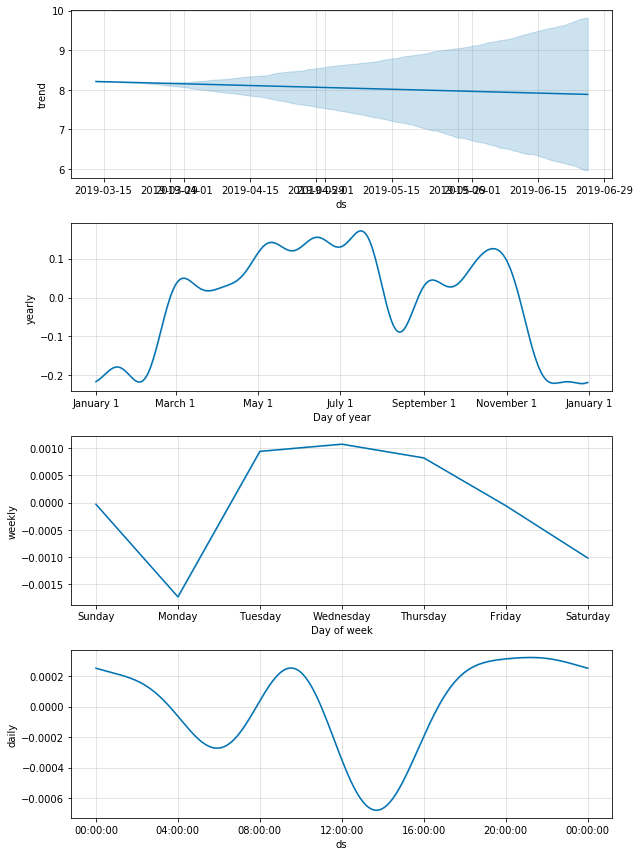

In [22]:
a = m.plot_components(fcst_sampled)

You can save the components plot to a file if you'd like

In [23]:
a.savefig('components_plot.png', dpi=200)